In [1]:
!pip install clearml
!pip install ultralytics 
!pip uninstall wandb -y

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.2/757.2 kB 25.4 MB/s eta 0:00:00
Found existing installation: wandb 0.16.2
Uninstalling wandb-0.16.2:
  Successfully uninstalled wandb-0.16.2


In [2]:
from kaggle_secrets import UserSecretsClient
 
CLEARML_API_ACCESS_KEY = UserSecretsClient().get_secret('CLEARML_API_ACCESS_KEY')
CLEARML_API_SECRET_KEY = UserSecretsClient().get_secret('CLEARML_API_SECRET_KEY')

In [3]:
%%writefile data_dvb.yaml
train: /kaggle/input/drons-vs-berds-yolo/dataset/train/images
val: /kaggle/input/drons-vs-berds-yolo/dataset/valid/images
test: /kaggle/input/drons-vs-berds-yolo/dataset/test/images
names:  
  0: drone

Writing data_dvb.yaml


In [4]:
import os
os.environ['CLEARML_WEB_HOST'] = 'https://app.clear.ml'
os.environ['CLEARML_API_HOST'] = 'https://api.clear.ml'
os.environ['CLEARML_FILES_HOST'] = 'https://files.clear.ml'
os.environ['CLEARML_API_ACCESS_KEY'] = CLEARML_API_ACCESS_KEY
os.environ['CLEARML_API_SECRET_KEY'] = CLEARML_API_SECRET_KEY

ClearML Task: created new task id=17b778350b594e85b3a1c0d8a74b1824
2024-05-22 10:42:51,334 - clearml.Repository Detection - WARNING - Failed accessing the jupyter server(s): []
2024-05-22 10:42:51,359 - clearml.Task - INFO - No repository found, storing script code instead
ClearML results page: https://app.clear.ml/projects/bda991b03ff34114b2ef93fc1e8d32ba/experiments/17b778350b594e85b3a1c0d8a74b1824/output/log


100%|██████████| 49.7M/49.7M [00:00<00:00, 304MB/s]


2024-05-22 10:43:12,900 - clearml.model - INFO - Selected model id: 5e85179693e641d99ac2000c296b8643
Ultralytics YOLOv8.2.18 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data_dvb.yaml, epochs=3, time=None, patience=100, batch=-1, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=True, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fals

100%|██████████| 755k/755k [00:00<00:00, 37.0MB/s]
2024-05-22 10:43:18,520	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-05-22 10:43:18,999	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 177MB/s]


AMP: checks passed ✅
AutoBatch: Computing optimal batch size for imgsz=1024
AutoBatch: CUDA:0 (Tesla P100-PCIE-16GB) 15.89G total, 0.26G reserved, 0.24G allocated, 15.40G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    25856899       202.4         1.250         47.24         104.5      (1, 3, 1024, 1024)                    list
    25856899       404.8         2.231         62.26         132.8      (2, 3, 1024, 1024)                    list
    25856899       809.6         4.389         115.2         213.3      (4, 3, 1024, 1024)                    list
    25856899        1619         8.095         225.1         297.4      (8, 3, 1024, 1024)                    list
    25856899        3239        16.349         408.6         522.2     (16, 3, 1024, 1024)                    list
AutoBatch: Using batch-size 8 for CUDA:0 8.77G/15.89G (55%) ✅


train: Scanning /kaggle/input/drons-vs-berds-yolo/dataset/train/labels... 38495 images, 3452 backgrounds, 2 corrupt:  92%|█████████▏| 38495/41632 [02:16<00:07, 408.90it/s]

ClearML Monitor: Could not detect iteration reporting, falling back to iterations as seconds-from-start


train: Scanning /kaggle/input/drons-vs-berds-yolo/dataset/train/labels... 41632 images, 3557 backgrounds, 4 corrupt: 100%|██████████| 41632/41632 [02:24<00:00, 287.32it/s]

train: WARNING ⚠️ /kaggle/input/drons-vs-berds-yolo/dataset/train/images/custom_fixed_wing_2_1132.jpg: ignoring corrupt image/label: negative label values [ -0.0034722]
train: WARNING ⚠️ /kaggle/input/drons-vs-berds-yolo/dataset/train/images/parrot_clear_birds_0366.jpg: ignoring corrupt image/label: negative label values [-0.00046296]
train: WARNING ⚠️ /kaggle/input/drons-vs-berds-yolo/dataset/train/images/swarm_dji_phantom_3726.jpg: ignoring corrupt image/label: negative label values [ -0.0026042]
train: WARNING ⚠️ /kaggle/input/drons-vs-berds-yolo/dataset/train/images/two_parrot_disco_1_2380.jpg: ignoring corrupt image/label: negative label values [ -0.0026042]


train: WARNING ⚠️ Cache directory /kaggle/input/drons-vs-berds-yolo/dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/drons-vs-berds-yolo/dataset/valid/labels... 7805 images, 737 backgrounds, 0 corrupt: 100%|██████████| 7805/7805 [00:28<00:00, 276.79it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/drons-vs-berds-yolo/dataset/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=0.01, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      11.2G      2.033      1.297      1.234          8       1024: 100%|██████████| 5204/5204 [1:10:29<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 488/488 [02:59<00:00,  2.72it/s]


                   all       7805       7068      0.625      0.543      0.571      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      11.2G      1.869      1.087      1.171          5       1024: 100%|██████████| 5204/5204 [1:09:36<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 488/488 [02:58<00:00,  2.74it/s]

                   all       7805       7068      0.782       0.69      0.718        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      11.2G      1.698     0.9054      1.109          6       1024: 100%|██████████| 5204/5204 [1:09:27<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 488/488 [02:59<00:00,  2.72it/s]

                   all       7805       7068      0.849      0.718      0.765       0.34



3 epochs completed in 3.646 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.1MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.1MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.18 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 488/488 [03:05<00:00,  2.63it/s]


                   all       7805       7068      0.849      0.718      0.765       0.34
Speed: 0.3ms preprocess, 16.7ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train


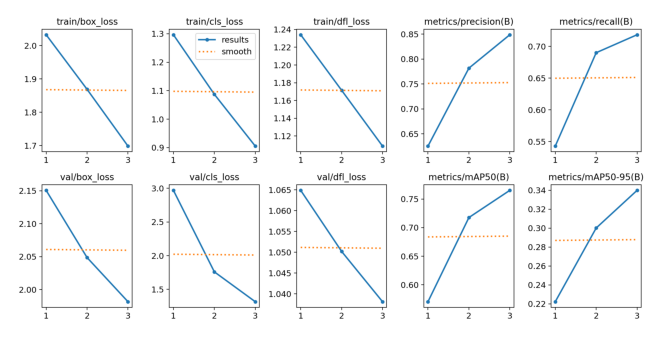

2024-05-22 14:30:07,810 - clearml.Task - INFO - Completed model upload to https://files.clear.ml/drons_vs_berds/yolov8m%203%20epoch.17b778350b594e85b3a1c0d8a74b1824/models/best.pt


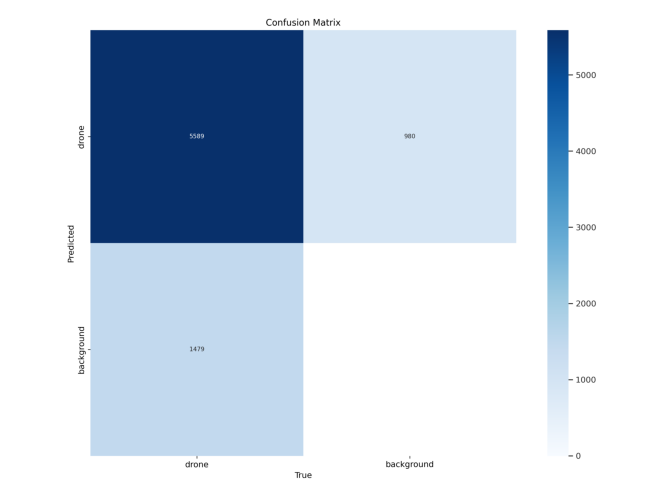

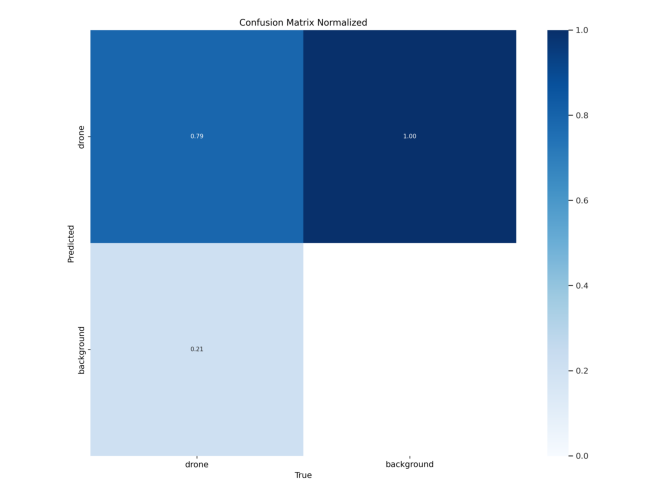

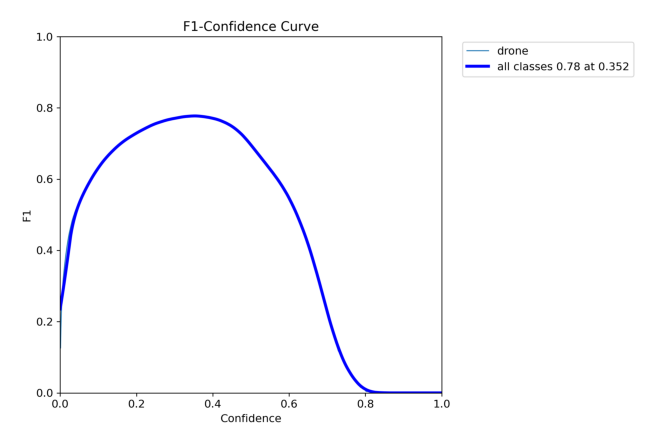

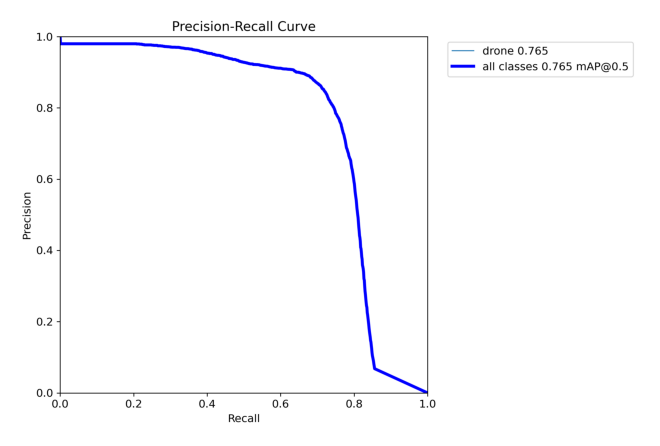

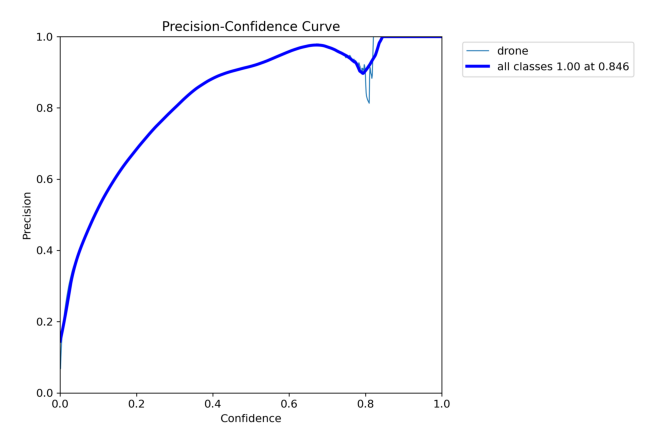

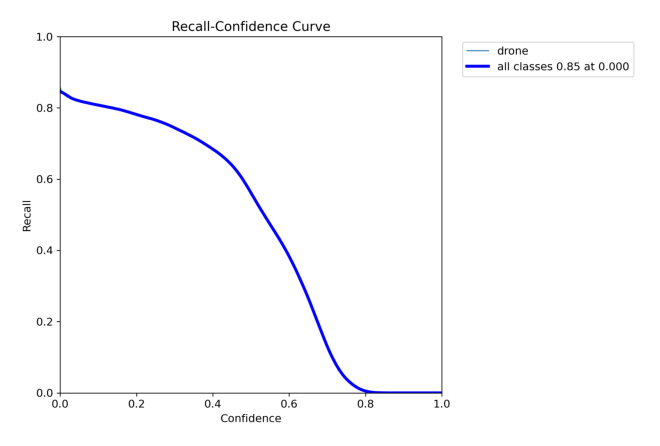

In [5]:
from clearml import Task
from ultralytics import YOLO

# Step 1: Creating a ClearML Task
task = Task.init(
    project_name="drons_vs_berds",
    task_name="yolov8m 3 epoch"
)
logger = task.get_logger()

# Step 2: Selecting the YOLOv8 Model
model_variant = "yolov8m"
task.set_parameter("model_variant", model_variant)

# Step 3: Loading the YOLOv8 Model
model = YOLO(f'{model_variant}.pt')

# Step 4: Setting Up Training Arguments
args = dict(data="data_dvb.yaml", 
            epochs=3,
            imgsz=1024,
            half= True,
#             scale=0.1,
#             warmup_epochs= 5,
            optimizer= "Adam",
            cos_lr= True,
#             lr0=0.001,
#             lrf= 0.0001,
            batch= -1)
 
task.connect(args)

# Step 5: Initiating Model Training
results = model.train(**args)

In [6]:
model_best = YOLO(f'/kaggle/working/runs/detect/train/weights/best.pt') 

In [7]:
metrics = model_best.val(data="data_dvb.yaml", split="test")

for name, value in metrics.results_dict.items():
    logger.report_single_value(name=f"test_{name}",value=value)

Ultralytics YOLOv8.2.18 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /kaggle/input/drons-vs-berds-yolo/dataset/test/labels... 3116 images, 258 backgrounds, 0 corrupt: 100%|██████████| 3116/3116 [00:15<00:00, 202.98it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/drons-vs-berds-yolo/dataset/test is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [01:04<00:00,  3.03it/s]


                   all       3116       3729      0.569       0.44      0.445      0.171
Speed: 0.3ms preprocess, 15.1ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val
